# Praktikum Informationstechnik im Maschinenbau II
## P04 - Übergang zu numpy

## Aufgabe 1: Programmierung einer Reihenentwicklung

Die Exponentionalfunktion kann bekanntlich mit der Reihenentwicklung
$$
e^x = 1 + \frac{x}{1!} + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots + \frac{x^{n_{max}}}{n_{max}!} = \sum_{k=0}^{\infty} \frac{x^k}{k!}  
$$
berechnet werden. Programmieren Sie die Lösung der Reihenentwicklung als selbstdefinierte Funktion `expo` in purem Python (ohne `numpy` oder `math`). Gestalten Sie die Funktion so, dass die maximale Anzahl der Summanden $n_{max}$ und das Abbruchkriterium für die Genauigkeit $\epsilon$ als Parameter übergeben werden können. Ohne Angabe sollen die Werte $n_{max} = 20$ und $\epsilon = 1 \times 10^{-8}$ gelten. 


### a) Schreiben der Funktionen

Hinweise

1. Schreiben Sie eine `while` oder eine `for`-Schleife
2. Sorgen Sie dafür, dass die Schleife spätestens nach $n_{max}$ Durchläufen unabhängig vom Ergebnis terminiert
3. Brechen Sie die Berechnung ab, wenn der letzte Term der Summe einen Absolutwert von $< \epsilon$ hat. 
4. Benutzen Sie außer den Standardschlüsselworten nur die Standardfunktionen `abs()` und `sum()`

Schreiben Sie zwei Varianten des Programms:
- eine Variante `expo_1`, in der Sie zunächst eine Function `faculty(n)` schreiben, die die Fakultät einer ganzen Zahl ausrechnet und zurückgibt. Diese Function verwenden Sie dann in der Berechnung der Terme der Reihe
- eine Variante `expo_2`, die ohne Berechnung der Fakulät auskommt (rekursiv)
- in beiden Fällen soll außer dem Ergebnis auch der x-Wert, die Anzahl Durchläufe und der Absolutwert des letzten Reihenterms zurückgegeben werden

### Variante 1

#### Berechnung der Fakulät einer ganzen Zahl

In [1]:
# Version mit while-Schleife
def faculty(n):
    y=1
    z=1
    while z<=n:
        y=y*z
        z=z+1
    return y
faculty(4)

24

In [2]:
# Alternative mit for-Schleife
def faculty(n):
    y=1
    z=1
    for z in range(1, n+1):
        y=y*z
    return y
faculty(5)

120

#### Reihenentwicklung unter Nutzung von `faculty()`

In [21]:
def expo_1(x):
    n=1
    ex=1
    while n<=20:
        ex=ex+(x**n) / faculty(n)
        n=n+1
    return ex


In [19]:
def expo_1(x, n=20, eps=1e-8):
    res=1
    for ex in range(1, n+1):
        term=x**ex / faculty(ex)
        if abs(term < eps):
            res = res+term
    return res

In [22]:
# Test
expo_1(-1)

0.36787944117144245

### Variante 2

#### rekursiv, ohne Fakultätsfunktion

In [23]:
def expo_2(x):
    


SyntaxError: incomplete input (1593629945.py, line 2)

In [ ]:
expo_2(1)

### b) Test der Genauigkeit und der Performance beider Varianten

1. Erzeugen Sie eine Liste `X` mit 1000 Werten zwischen -5 und + 5 (ohne `numpy`, als `list comprehension`)
2. Erzeugen Sie eine Liste `Y` mit den Ergebnissen der Berechnung mit `expo_1` (ebenfalls als  `list comprehension`)
3. Welche Hinweise liefern Ihnen die Ergebnisse? In welchem Wertebereich erhalten Sie eine akzeptable Genauigkeit bei $n_{max} = 20$? Schauen Sie sich dazu jeden 50. Wert der Liste an. Liefert `expo_2` andere Ergebnisse?
4. Messen Sie die Laufzeiten der beiden Programmierungsvarianten mit der `magic`-Funktion `%%timeit -n 10` (muss als erste Anweisung in der Zelle stehen, auch kein Kommentar davor. `-n 10` begrenzt die Zahl der Durchläufe)

In [ ]:
offs = -5
N = 1000
step = 10/N

X = [offs + lv*step ]

In [38]:
# Ausrechnen der Funktionswerte zu jedem Element in X

Y = [expo_1(x) for x in X]
# Ausgeben jedes 50. Werts


NameError: name 'X' is not defined

### c) Dieselbe Rechnung unter Nutzung der Methode `.exp()` des `ndarray`-Objekts

1. Erzeugen Sie ein Array `Xnp` mit 1000 Werten zwischen -5 und + 5 (mit `numpy.arange` oder `numpy.linspace`) 
2. Erzeugen Sie ein Array `Ynp` aus Ergebnissen der Berechnung mit `.exp()` (nur Funktionswerte)
4. Messen Sie die Laufzeit 
3. "Casten" Sie `Y` (Ergebnis aus Aufgabenteil b) ) in ein np.array und geben Sie die Anzahl Dimensionen und die "shape" an.
7. Erzeugen Sie eine Wertetabelle mit den Spalten x-Wert und Berechnungsfehler `y - ynp`. Geben Sie jeden 50. Wert aus
8. Stellen Sie den Fehler grafisch dar


In [26]:
# Importieren von numpy
import numpy as np

In [33]:
# Erzeugen einer Wertefolge
N = 1000
step = 10/N

Xnp = np.arange(-5, 5, step)

Xnp.shape

(1000,)

In [35]:
# Berechnen der Ergebnisse
Ynp = np.exp(Xnp)

Ein Durchlauf erfordert wenige Mikrosekunden !

In [ ]:
# "Casten" von Y als np.array

# Ausgeben der Zahl der Dims und der shape

In [36]:
# Fehlerberechnung
fehler = Ynp - np.array(Y)[:,1]

NameError: name 'Y' is not defined

In [ ]:
# Wertetabelle


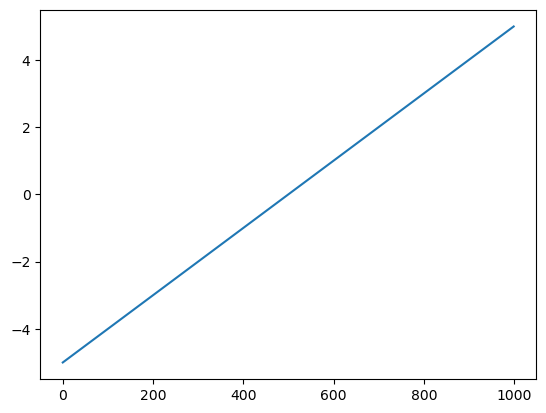

In [37]:
# Grafische Darstellung
import matplotlib.pyplot as plt
plt.plot(Xnp)